In [1]:
    import numpy as np

    

In [16]:
def MSEStep(X, y, W, b, learn_rate = 0.005):
    """
    This function implements the gradient descent step for squared error as a
    performance metric.
    
    Parameters
    X : array of predictor features
    y : array of outcome values
    W : predictor feature coefficients
    b : regression function intercept
    learn_rate : learning rate

    Returns
    W_new : predictor feature coefficients following gradient descent step
    b_new : intercept following gradient descent step
    """
    
    # This code follows the squared method which has the formula
	# y = (w1 + x(y-yhat)*alpha) + 	(w2 + (y-yhat)*alpha)
	
	# First we need the starting line which based on the initialization
	# of W the slope matrix of size 100,1 and b - the y-intercept to be
	# zeros, the initial line is just y=0 which is a horizontal line
	#
	# Now that we have all the points and the starting line we can
	# start to find the errors
	
	# Use the standard line formula of y= mx + b or in our case
	# X is a minimbatch of twenty x values in a (20,1) matrix that is
	# multiplied by W which is a vector of shape (1). Recall that matrix
	# multiplication requires the inner numbers to match (20,1)*(1,), the ones
	# match so this works and muliplies the twenty X values by the current 
	# value for the slope or 'mx'.  Then you add the current y-intercept
	# which is the b scalar.  We now have the predicted y values for first
	# twenty.  We can now find the error or (y - y_pred) in error vector.
	
    y_pred = np.matmul(X,W) + b # X Matrix shape (20,1) * Vector W shape (1,)
    error = y - y_pred
    
    # compute steps
    # Now that we have the error vector, we can calculate the squares method
    # W_new matrix is current slope + error vector * X vector
    W_new = W + learn_rate * np.matmul(error, X)
    b_new = b + learn_rate * error.sum()

    print("Size of W_new is {} and b_new is {}".format(W_new.shape,b_new.shape))
    print("Value of W_new is {} and b_new is {}".format(W_new[0],b_new))
    return W_new, b_new

In [20]:
def miniBatchGD(X, y, batch_size = 20, learn_rate = 0.005, num_iter = 25):
    """
    This function performs mini-batch gradient descent on a given dataset.

    Parameters
    X : array of predictor features
    y : array of outcome values
    batch_size : how many data points will be sampled for each iteration
    learn_rate : learning rate
    num_iter : number of batches used

    Returns
    regression_coef : array of slopes and intercepts generated by gradient
    descent procedure
    """
    n_points = X.shape[0]
    W = np.zeros(X.shape[1]) # coefficients
    b = 0 # intercept
    print("num_iter is {}".format(num_iter))
    # run iterations
    regression_coef = [np.hstack((W,b))]
    for _ in range(num_iter):
        batch = np.random.choice(range(n_points), batch_size)
        print(batch)
        X_batch = X[batch,:]
        y_batch = y[batch]
        W, b = MSEStep(X_batch, y_batch, W, b, learn_rate)
        regression_coef.append(np.hstack((W,b)))
    
    return regression_coef

num_iter is 25
[31 67 52 31 56 45  3 27 33 90 97 97 63 51 41 73 66 36 77 67]
Size of W_new is (1,) and b_new is ()
Value of W_new is 0.0714514230475 and b_new is 0.2013038
[ 4  8 38 79 96 23 44 50 57 34 26 15 15 28 32 64 27 96  9 52]
Size of W_new is (1,) and b_new is ()
Value of W_new is 0.08162528354355769 and b_new is 0.3767496042256834
[69 34 53 16  4 99 35 88 25 42 35 79 72 97 76 96 42 96 21 86]
Size of W_new is (1,) and b_new is ()
Value of W_new is 0.1273269451632449 and b_new is 0.5284743862814195
[16  6 17 16 30 69 81 78 32 41 70 90 39  3 27 23 31 29 86 14]
Size of W_new is (1,) and b_new is ()
Value of W_new is 0.15914564996364844 and b_new is 0.6616045468430045
[98 83 18 28 11 17 25  3 53 28 98 57 86 49 55 22  3 17 32  9]
Size of W_new is (1,) and b_new is ()
Value of W_new is 0.15453608214736606 and b_new is 0.7942794562961542
[44 57 67 80 27 52 78 27 55 37 90 24  5 68 92 48 36 14 53 23]
Size of W_new is (1,) and b_new is ()
Value of W_new is 0.1417462865016136 and b_new is

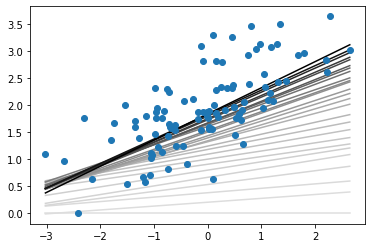

In [21]:
# perform gradient descent
data = np.loadtxt('ml_tf_ex1.csv', delimiter = ',')
X = data[:,:-1]
y = data[:,-1]
#print(X)
regression_coef = miniBatchGD(X, y)

# plot the results
import matplotlib.pyplot as plt

plt.figure()
X_min = X.min()
X_max = X.max()
counter = len(regression_coef)
for W, b in regression_coef:
    counter -= 1
    color = [1 - 0.92 ** counter for _ in range(3)]
    plt.plot([X_min, X_max],[X_min * W + b, X_max * W + b], color = color)
plt.scatter(X, y, zorder = 3)
plt.show()

In [8]:
print(type(regression_coef[0]))
print(regression_coef[0].shape)
print(regression_coef[1])

<class 'numpy.ndarray'>
(2,)
[0.02952182 0.1962367 ]
